In [1]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

##### The input image

In [2]:
# Load the input image
input_image = cv2.imread('.\\originals\\De-noised.jpeg', cv2.IMREAD_GRAYSCALE)

In [63]:
r, c = input_image.shape
print(r, c)

1024 512


##### Helper functions

In [7]:
### display image ###

def display(img1):
   plt.imshow(img1, cmap='gray')
   plt.axis('off')  # Turn off axis labels and ticks
   plt.show()

In [ ]:
#extract the patches from the image
    # returns the list of patches
def get_patches(img, box):
    # Get the dimensions of the input image
    rows, cols = img.shape
    box_width, box_height = box[1], box[0]

    # Calculate the number of patches in each dimension
    num_patches_x = cols // box_width
    num_patches_y = rows // box_height

    # Create a list to store the patches
    patches = []

    # Iterate through the patches and create a list of non-overlapping patches
    for i in range(num_patches_y):
        for j in range(num_patches_x):
            # Define the coordinates of the current patch
            patch_x1 = j * box_width
            patch_x2 = (j + 1) * box_width
            patch_y1 = i * box_height
            patch_y2 = (i + 1) * box_height

            # Extract the patch using slicing
            patch = img[patch_y1:patch_y2, patch_x1:patch_x2]

            # Append the patch to the list
            patches.append(patch)

    return patches

##### Functions

In [ ]:
### image processing ###
def process(img, threshold, box):
    h, w= box
    result_img = np.copy(img)
    half_w, half_h = w // 2, h // 2

    for y in range(half_h, img.shape[0] - half_h):
        for x in range(half_w, img.shape[1] - half_w):
            patch = img[y - half_h:y + half_h + 1, x - half_w:x + half_w + 1]
            patch_avg = np.mean(patch)

            if img[y, x] < threshold:
                continue
            else:
                result_img[y, x] = patch_avg

    return result_img

In [188]:
#replace non-black pixels with patch average value
def process2(img, threshold, box):
    # Get the dimensions of the input image
    rows, cols = img.shape

    #the result array  #same shape as input
    result = np.zeros((rows, cols))

    # Define the dimensions of the box (patch)
    box_width, box_height = box[1], box[0]

    # process the image one patch at a time
    for y in range(0, rows, box_height):
        for x in range(0, cols, box_width):
            # Extract the patch
            patch = img[y:y+box_height, x:x+box_width]

            # Calculate patch average
            avg = np.mean(patch[:,:])

            # Chnage all non-black pixels to avg
            patch[patch > threshold] = avg

            # Update the patch in the result image 
            result[y:y+box_height, x:x+box_width] = patch

    return result

In [3]:
# make black pixels blacker (root n)
# replace non black pixels by average patch value
def process3(img, threshold, box):
    # shape of input image
    rows, cols = img.shape

    #the result array  #same shape as input
    result = np.zeros((rows, cols))

    # get width and height of the patch (box)
    box_width, box_height = box[1], box[0]

    # process the image one patch at a time
    for y in range(0, rows, box_height):
        for x in range(0, cols, box_width):
            # Extract the patch
            patch = img[y:y+box_height, x:x+box_width]

            # Calculate the average patch value
            avg = np.mean(patch[:,:])

            # if the patch average is considered black
            if avg <= threshold:
                # make the black pixels blacker
                patch[patch <= threshold] = avg*(0.5)
                # make the non-black pixels brighter
                patch[patch > threshold] = avg*(1.1)
            else:
                # make all pixels avg
                patch[:, :] = avg*(1.1)

            # Update the patch in the result image
            result[y:y+box_height, x:x+box_width] = patch

    return result

In [6]:
# make black pixels blacker (root n)
# replace non black pixels by average patch value
def process4(img, threshold, box):
    # shape of input image
    rows, cols = img.shape

    #the result array  #same shape as input
    result = np.zeros((rows, cols))

    # get width and height of the patch (box)
    box_width, box_height = box[1], box[0]

    # process the image one patch at a time
    for y in range(0, rows, box_height):
        for x in range(0, cols, box_width):
            # Extract the patch
            patch = img[y:y+box_height, x:x+box_width]

            # Calculate the average patch value
            avg = np.mean(patch[:,:])

            # if the patch average is considered black
            if avg <= threshold:
                # make the black pixels blacker
                patch[patch <= threshold] = avg
                #patch[patch <= threshold]*(0.5)
                # make the non-black pixels brighter
                patch[patch > threshold] = patch[patch > threshold]*(1.1)
            else:
                # make all pixels avg
                patch[:, :] = avg*(1.1)

            # Update the patch in the result image
            result[y:y+box_height, x:x+box_width] = patch

    return result

In [13]:
# make black pixels blacker (root n)
# replace non black pixels by average patch value
def denoise(img, threshold, box):
    # shape of input image
    rows, cols = img.shape

    #the result array  #same shape as input
    result = img.copy()

    # get width and height of the patch (box)
    box_width, box_height = box[1], box[0]

    # denoise the image one patch at a time
    for y in range(0, rows, box_height):
        for x in range(0, cols, box_width):
            # Extract the patch
            patch = img[y:y+box_height, x:x+box_width]

            # Calculate the average patch value
            avg = np.mean(patch[:,:])

            # if the patch average is considered black
            if avg <= threshold:
                # make the black pixels blacker
                patch[patch <= threshold] = patch[patch <= threshold]*(0.8)
                # make the non-black pixels brighter
                patch[patch > threshold] = avg*(1.1)
            #else:
                # make all pixels avg
                #patch[:, :] = avg*(1.1)

            # Update the patch in the result image
            result[y:y+box_height, x:x+box_width] = patch

    return result

##### Testing

In [14]:
##### call the function #####

# hyper-parameters
threshold_value = 50
box_size = (3,5) #(rows, cols)

# Process the image
result_image = denoise(input_image, threshold_value, box_size)
#result_image = process(temp, threshold_value, box2)

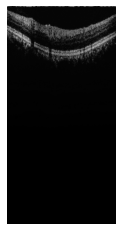

In [15]:
### display the output ###

#display(input_image)
#print()
display(result_image)

In [16]:
### Save the output image ###
#cv2.imwrite('output_2.jpg', result_image)
cv2.imwrite('denoised.jpg', result_image)

True